In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

In [67]:
#path ='file/'
path = '../input/'
state_ts = pd.read_csv('../zecon/State_time_series.csv')#,parse_dates=['Date'])
print('Number of rows and columns in state ts:',state_ts.shape)

Number of rows and columns in state ts: (13212, 82)


In [59]:
state_ts.tail()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
13207,2017-12-31,Virginia,NaN,39599.0,36664.0,242.105263,146.157362,143.816452,147.329650,153.763978,...,133500.0,291300.0,246200.0,237300.0,492700.0,1538.0,1500.0,0.948,1738.0,1441.0
13208,2017-12-31,Washington,NaN,17918.0,15109.0,304.291151,220.017256,195.881979,188.990826,201.271186,...,208200.0,337600.0,351300.0,352800.0,662700.0,1842.0,1803.0,1.132,1690.0,1828.0
13209,2017-12-31,WestVirginia,NaN,9800.0,9422.0,119.723429,77.764277,89.272003,93.071172,88.122881,...,63800.0,115100.0,103500.0,103300.0,174300.0,858.0,858.0,0.674,846.0,858.0
13210,2017-12-31,Wisconsin,NaN,27273.0,23370.0,145.664583,129.727412,127.136334,116.753927,95.573529,...,107200.0,158700.0,169300.0,170200.0,280600.0,1179.0,1153.0,0.920,1068.0,1163.0
13211,2017-12-31,Wyoming,NaN,4337.0,3992.0,172.943376,148.544590,137.093704,147.855347,153.846154,...,140400.0,195600.0,200200.0,200500.0,315900.0,1144.0,1115.0,0.902,1023.0,1120.0


In [3]:
# Analysis
print('Date range:{} to {}'.format(state_ts['Date'].min(),state_ts['Date'].max()))
print('Number of States',state_ts['RegionName'].nunique())

Date range:1996-04-30 00:00:00 to 2017-12-31 00:00:00
Number of States 52


In [4]:
state_month = state_ts.resample('M',on='Date').mean()
state_month = state_month.reset_index()
state_month.shape

(261, 81)

In [5]:
# Sample data by region name
state_vise = state_ts.groupby(['RegionName']).mean()
state_vise.shape

(52, 80)

In [6]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

In [10]:
state_ts.columns

Index(['RegionName', 'DaysOnZillow_AllHomes',
       'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes',
       'MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex',
       'MedianListingPrice_SingleFamilyResidence',
       'MedianPctOfPriceReduction_AllHomes',
       'MedianPctOfPriceReduction_CondoCoop',
       'MedianPctOfPri

In [62]:
print(state_ts.head())

            Date   RegionName  DaysOnZillow_AllHomes  \
2011  1999-10-31     Arkansas                    NaN   
2012  1999-10-31   California                    NaN   
2013  1999-10-31     Colorado                    NaN   
2014  1999-10-31  Connecticut                    NaN   
2015  1999-10-31     Delaware                    NaN   

      InventorySeasonallyAdjusted_AllHomes  InventoryRaw_AllHomes  \
2011                                   NaN                    NaN   
2012                                   NaN                    NaN   
2013                                   NaN                    NaN   
2014                                   NaN                    NaN   
2015                                   NaN                    NaN   

      MedianListingPricePerSqft_1Bedroom  MedianListingPricePerSqft_2Bedroom  \
2011                                 NaN                                 NaN   
2012                                 NaN                                 NaN   
2013    

In [68]:
state_ts=state_ts[(state_ts['Date'] > '2010-01-01') & (state_ts['Date'] < '2020-02-01')]
#state_ts.loc['2010-01-01':'2020-12-01']

In [69]:
state_ts.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
8221,2010-01-31,Alabama,169.0,32616.0,29765.0,NaN,98.491968,93.097826,103.935698,110.909091,...,67900.0,137300.0,123800.0,123300.0,232500.0,NaN,NaN,NaN,NaN,NaN
8222,2010-01-31,Alaska,130.0,3477.0,2748.0,182.03125,163.351878,154.224835,144.439421,125.418060,...,177200.0,176100.0,247200.0,257100.0,356200.0,NaN,NaN,NaN,NaN,NaN
8223,2010-01-31,Arizona,112.0,50221.0,50480.0,NaN,NaN,NaN,NaN,NaN,...,95700.0,121800.0,161300.0,168600.0,298400.0,NaN,NaN,NaN,NaN,NaN
8224,2010-01-31,Arkansas,121.0,18475.0,17418.0,NaN,81.407259,86.213992,94.743421,96.915394,...,59200.0,127500.0,105800.0,105800.0,185100.0,NaN,NaN,NaN,NaN,NaN
8225,2010-01-31,California,108.0,138652.0,132194.0,NaN,NaN,NaN,NaN,NaN,...,163600.0,313600.0,335100.0,340000.0,655700.0,NaN,NaN,NaN,NaN,NaN


In [51]:
state_ts=state_ts.reset_index()

In [70]:
state_ts.describe()

,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
count,4845.000000,4896.000000,4896.000000,3586.000000,4534.000000,4607.000000,4677.000000,4569.000000,4674.000000,4149.000000,...,4704.000000,4416.000000,4800.000000,4800.000000,4757.000000,4254.000000,4336.000000,4336.000000,4336.000000,4254.000000
mean,110.117363,33292.662786,33299.013685,182.470536,135.490657,129.448515,133.458743,135.668871,136.660141,163.547190,...,110375.616497,175222.509058,189077.520833,194192.791667,335566.743746,1321.329807,1318.055581,0.929661,1233.050277,1327.520686
std,27.474195,34926.704422,35014.163714,99.809488,74.250919,58.837700,58.339837,64.920918,68.762969,99.420552,...,50719.066208,92614.380450,87430.644540,98409.053353,156892.333604,371.006175,368.783157,0.284986,369.426763,383.309444
min,49.250000,972.000000,911.000000,57.142857,60.000000,56.476684,61.804124,63.775510,62.143473,61.915888,...,44300.000000,64000.000000,87700.000000,86100.000000,150000.000000,799.000000,799.000000,0.560000,713.000000,799.000000
25%,90.250000,9828.500000,9756.250000,125.688504,92.158518,93.282743,99.601594,99.082187,96.009566,113.083451,...,69500.000000,121375.000000,124400.000000,124675.000000,232100.000000,1047.000000,1036.000000,0.728000,959.750000,1039.250000
50%,108.500000,21712.500000,21289.000000,162.754210,121.300723,116.626794,119.816221,119.751076,120.581983,140.996376,...,103100.000000,151100.000000,165500.000000,167550.000000,290600.000000,1210.000000,1210.000000,0.862000,1126.000000,1220.000000
75%,126.750000,47453.000000,46891.000000,202.629803,152.242031,143.188721,144.752714,149.352921,153.443320,177.074899,...,136200.000000,184500.000000,223850.000000,226725.000000,382900.000000,1474.000000,1477.000000,1.074000,1399.500000,1467.750000
max,251.625000,260687.000000,268055.000000,627.551020,550.639135,460.465116,480.769231,617.955266,520.718864,1000.000000,...,333500.000000,782900.000000,620400.000000,737500.000000,988100.000000,2690.000000,2653.000000,2.294000,2606.000000,2754.000000


In [71]:
state_ts.count()

Date                                                             4991
RegionName                                                       4991
DaysOnZillow_AllHomes                                            4845
InventorySeasonallyAdjusted_AllHomes                             4896
InventoryRaw_AllHomes                                            4896
MedianListingPricePerSqft_1Bedroom                               3586
MedianListingPricePerSqft_2Bedroom                               4534
MedianListingPricePerSqft_3Bedroom                               4607
MedianListingPricePerSqft_4Bedroom                               4677
MedianListingPricePerSqft_5BedroomOrMore                         4569
MedianListingPricePerSqft_AllHomes                               4674
MedianListingPricePerSqft_CondoCoop                              4149
MedianListingPricePerSqft_DuplexTriplex                          3964
MedianListingPricePerSqft_SingleFamilyResidence                  4639
MedianListingPrice_1

In [14]:
state_ts.index

DatetimeIndex(['1996-04-30', '1996-04-30', '1996-04-30', '1996-04-30',
               '1996-04-30', '1996-04-30', '1996-04-30', '1996-04-30',
               '1996-04-30', '1996-04-30',
               ...
               '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31',
               '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31',
               '2017-12-31', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=13212, freq=None)

In [72]:
state_ts['Region']='Georgia'

In [35]:
state_ts['Sale_Prices']=state_ts['Sale_Prices'].fillna(state_ts['Sale_Prices'].mean())

In [36]:
#state_ts['Date'] = pd.datetime(state_ts['Date'])
#state_ts = state_ts.set_index('Date')
ts = state_ts['Sale_Prices']#'MedianSoldPrice_AllHomes']
ts.head()

Date
1996-04-30    194551.777666
1996-04-30    194551.777666
1996-04-30    194551.777666
1996-04-30    194551.777666
1996-04-30    194551.777666
Name: Sale_Prices, dtype: float64

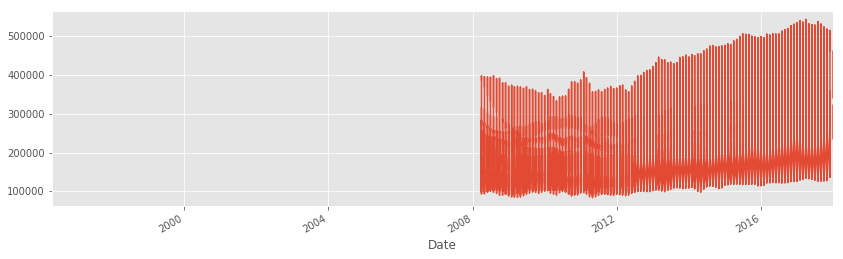

In [27]:
plt.figure(figsize=(14,4))
ts.plot()

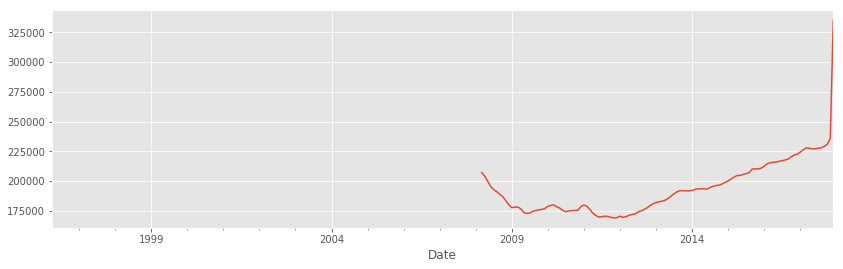

In [28]:
# Resample data by monthly
plt.figure(figsize=(14,4))
ts = ts.resample('M').mean()
ts.plot()

In [30]:
# forward fill for nan values
ts = ts.ffill()

Perfom Dickey fuller test
Test Statistic                -1.486536e+01
p-value                        1.694687e-27
#Lags Used                     4.100000e+01
Number of Observations Used    1.317000e+04
Critical Value (1%)           -3.430847e+00
Critical Value (5%)           -2.861759e+00
Critical Value (10%)          -2.566887e+00
dtype: float64


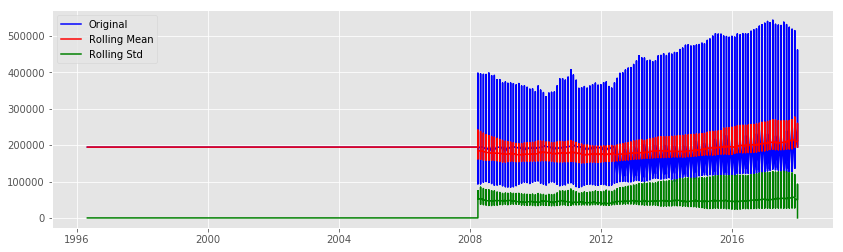

In [37]:
def test_stationarity(timeseries):
    
    #rolling statics
    rol_mean = timeseries.rolling(window = 12).mean()
    rol_std = timeseries.rolling(window = 12).std()
    
    #plot rolling statistics
    plt.figure(figsize=(14,4))
    plt.plot(ts, color = 'b', label = 'Original')
    plt.plot(rol_mean, color = 'r', label = 'Rolling Mean')
    plt.plot(rol_std, color = 'g', label = 'Rolling Std')
    plt.legend(loc='best')
    
    # Dickey fuller test
    print('Perfom Dickey fuller test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(ts)

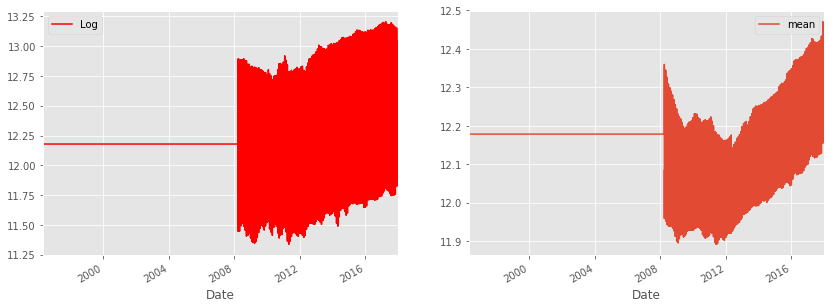

In [38]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
ax1, ax2 = ax.flatten()

ts_log = np.log(ts)
ts_log.plot(ax=ax1, label = 'Log',color = 'r')
ax1.legend(loc = 'best')

ts_ma = ts_log.rolling(12).mean()
ts_ma.plot(ax = ax2, label = 'mean')
ax2.legend(loc = 'best')

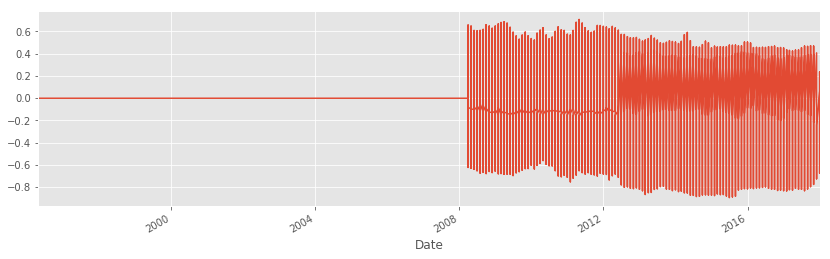

In [39]:
plt.figure(figsize=(14,4))
ts_dif = ts_ma - ts_log
ts_dif = ts_dif.dropna() # fill na
ts_dif.plot()

Perfom Dickey fuller test
Test Statistic                   -43.681733
p-value                            0.000000
#Lags Used                        41.000000
Number of Observations Used    13159.000000
Critical Value (1%)               -3.430847
Critical Value (5%)               -2.861760
Critical Value (10%)              -2.566887
dtype: float64


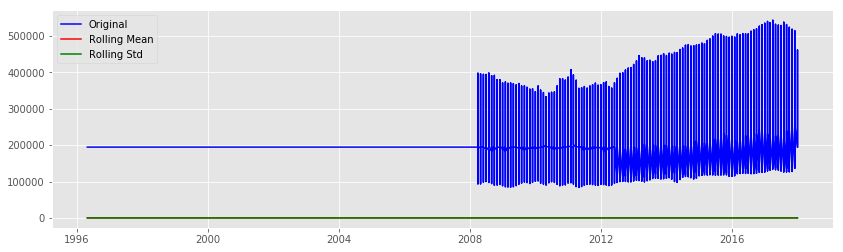

In [40]:
test_stationarity(ts_dif)

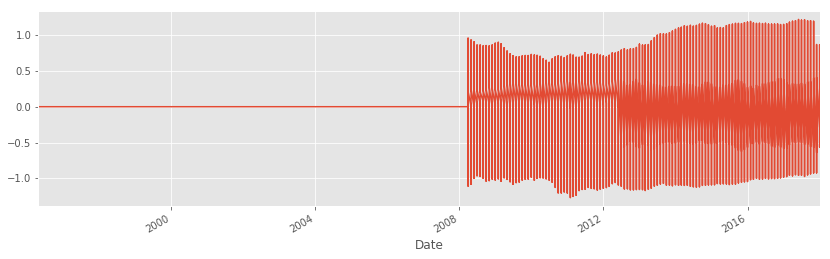

In [41]:
# Differencing
ts_log_dif = ts_log - ts_log.shift()
plt.figure(figsize=(14,4))
ts_log_dif.plot()

Perfom Dickey fuller test
Test Statistic                   -27.408725
p-value                            0.000000
#Lags Used                        40.000000
Number of Observations Used    13170.000000
Critical Value (1%)               -3.430847
Critical Value (5%)               -2.861759
Critical Value (10%)              -2.566887
dtype: float64


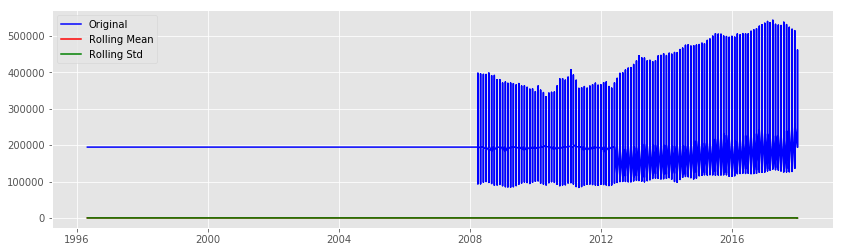

In [42]:
ts_log_dif.dropna(inplace = True)
test_stationarity(ts_log_dif)

In [43]:
# Decomposing
docom = seasonal_decompose(ts_dif)
fig,ax = plt.subplots(3,1,figsize=(14,8))
ax
ax[0].plot(docom.resid,label = 'Residual', color = 'r')
ax[0].legend(loc= 'best')
ax[1].plot(docom.seasonal, label = 'Seasonal', color = 'b')
ax[1].legend(loc = 'best')
ax[2].plot(docom.trend,  label = 'Trend', color = 'b')
ax[2].legend(loc = 'best')

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None